In [1]:
from fastai import *
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

# Intent

For this project my intention is to build a model which differentiates between different dog breeds.

I will also take special care in understanding every line of code. The goal is to be able to do this without any documentation and with an intuitive understanding of the necessary code

In [47]:
key = os.environ.get('AZURE_SEARCH_KEY', 'f980b6acae034087a57a4d158ce7f56a')

In [48]:
results = search_images_bing(key,'golden doodle')
ims = results.attrgot('contentUrl')
len(ims)

150

In [49]:
# let's load some pictures of cats and dogs. We will do this using the search image and url download function

dog_breeds = 'golden doodle','german shepherd','cuckapoo'
path = Path('dogs')

In [45]:
import shutil

shutil.rmtree(path)


In [50]:
if not path.exists():
    path.mkdir()
    
for o in dog_breeds:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} adult dog')
    download_images(dest, urls=results.attrgot('contentUrl'))
    time.sleep(8)
    results = search_images_bing(key, f'{o} puppy')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [51]:
fns = get_image_files(path)
fns                   

(#853) [Path('dogs/german shepherd/bc5010db-86ca-4eed-92a7-d0cf496a8a93.jpg'),Path('dogs/german shepherd/a1b713c9-609e-4607-a253-b68cdca09cf9.jpg'),Path('dogs/german shepherd/f05061bd-5c10-4a74-a309-c1466d90bdc8.jpg'),Path('dogs/german shepherd/47e64fad-2e67-43cd-919f-7182c523d24e.jpg'),Path('dogs/german shepherd/6b7377e9-f374-4f04-841b-9c85a169d720.jpg'),Path('dogs/german shepherd/471beac1-6753-446b-8eff-6b5e1d59d756.jpg'),Path('dogs/german shepherd/b327281f-b44f-4e5c-a754-c0996901fe80.jpg'),Path('dogs/german shepherd/ade11b37-0550-425f-bc0f-6530ca9db192.jpg'),Path('dogs/german shepherd/dfc029d8-75c9-4b8d-b458-6b1af23c989f.jpg'),Path('dogs/german shepherd/e66b2be9-1e4d-4be5-b635-104fd380d34d.jpg')...]

In [52]:
failed = verify_images(fns)
failed

(#16) [Path('dogs/german shepherd/81adcaca-1d73-4a43-9a10-da54ef48c85d.jpg'),Path('dogs/german shepherd/98fd315b-57bc-41df-8281-98ee5d947613.jpg'),Path('dogs/german shepherd/62d86a15-f741-4a0f-b7ee-ab943f478fb2.jpg'),Path('dogs/german shepherd/23003cd5-4627-46fc-8414-65729933bf5b.jpg'),Path('dogs/german shepherd/66a3d1d4-97bc-4d59-bc45-6f37f55b84cd.jpg'),Path('dogs/german shepherd/3d5f7ae2-1c26-4970-b0a7-28962ed8a5de.jpg'),Path('dogs/german shepherd/90100589-ac6b-483f-9e95-98e695f359fc.jpg'),Path('dogs/german shepherd/ee640945-be52-4867-8603-493b481c1fe9.jpg'),Path('dogs/golden doodle/6315aa25-bb1b-4fe1-95d3-976d981526de.jpg'),Path('dogs/golden doodle/db07f452-f5c0-4dc0-8255-b8ffc9c9abab.jpg')...]

In [53]:
failed.map(Path.unlink)

(#16) [None,None,None,None,None,None,None,None,None,None...]

In [39]:
dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [40]:
dls = dogs.dataloaders(path)

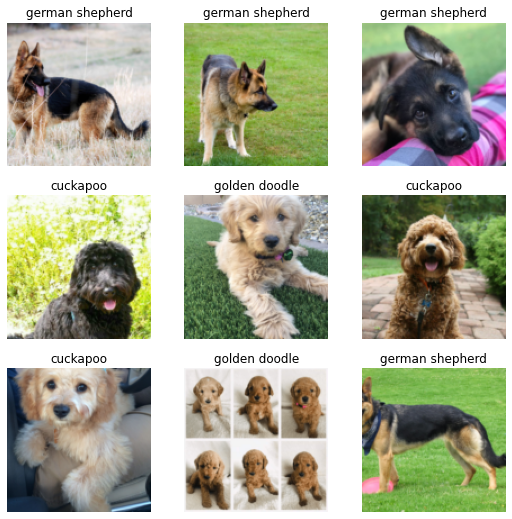

In [42]:
dls.show_batch()

In [ ]:
dogs = dogs.new(item_tfms=Resize(128, 
                                 ResizeMethod.Squish))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

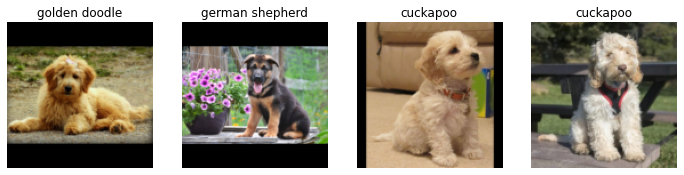

In [57]:
dogs = dogs.new(item_tfms=Resize(128, 
                                 ResizeMethod.Pad,
                                 pad_mode='zeros'))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

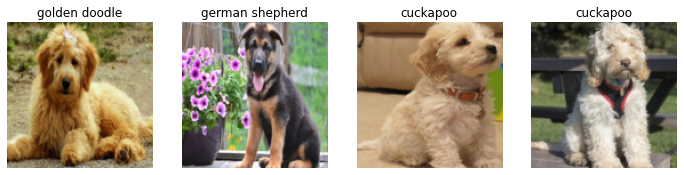

In [58]:
dogs = dogs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

# Data Augmentation

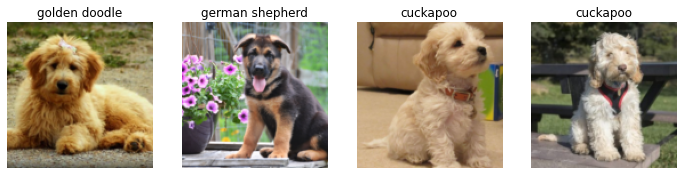

In [59]:
dogs = dogs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = dogs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

# We will now train a classifier

In [61]:
dogs = dogs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dogs.dataloaders(path)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.126713,0.451396,0.125749,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.447540,0.310739,0.113772,00:14
1,0.393429,0.357547,0.125749,00:13
2,0.336704,0.342997,0.083832,00:13
3,0.292713,0.315901,0.077844,00:15


In [62]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.200019,0.290731,0.083832,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.184930,0.253182,0.059880,00:13
1,0.163190,0.286659,0.071856,00:13
2,0.176421,0.419627,0.089820,00:13
3,0.159976,0.341638,0.095808,00:14
4,0.144154,0.346127,0.083832,00:14
5,0.125248,0.334922,0.083832,00:14


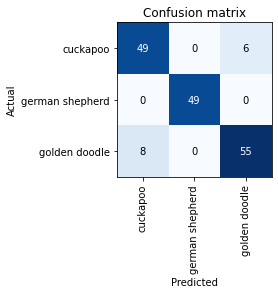

In [63]:
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

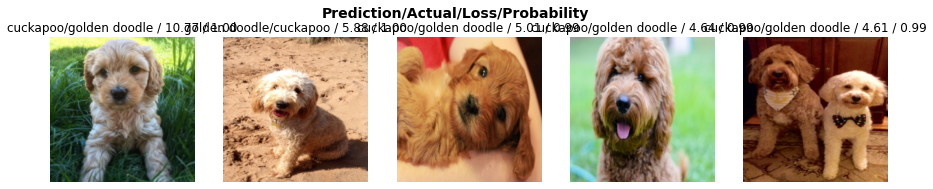

In [65]:
interp.plot_top_losses(5, nrows=1)

In [68]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [69]:
!git init https://github.com/kgeesawor/mlprojects.git

Initialized empty Git repository in /notebooks/_personalProjects/https:/github.com/kgeesawor/mlprojects.git/.git/


In [70]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../01_intro.ipynb
	modified:   ../02_production.ipynb
	modified:   ../clean/02_production.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../.gradient/
	./

no changes added to commit (use "git add" and/or "git commit -a")


In [71]:
!git add selfStudy-01.ipynb

In [ ]:
!git commit -m 'fastai01'
!git push

[master 9e4b33e] fastai01
 1 file changed, 955 insertions(+)
 create mode 100644 _personalProjects/selfStudy-01.ipynb
Username for 'https://github.com': 